# Chapitre 5


In [18]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
datasets = pds.read_excel("dataset.xlsx")
datasets.corr()

,AMZN,BRENT,CAC40,NQ100,DJI30,DAX30,GOLD,EURUSD
AMZN,1.000000,-0.421819,0.778211,0.960369,0.950870,0.743347,-0.302171,-0.470636
BRENT,-0.421819,1.000000,-0.599353,-0.554603,-0.492757,-0.664231,0.652618,0.899293
CAC40,0.778211,-0.599353,1.000000,0.900011,0.898059,0.981916,-0.653307,-0.560685
NQ100,0.960369,-0.554603,0.900011,1.000000,0.989948,0.881750,-0.470683,-0.557515
DJI30,0.950870,-0.492757,0.898059,0.989948,1.000000,0.878014,-0.449811,-0.488816
DAX30,0.743347,-0.664231,0.981916,0.881750,0.878014,1.000000,-0.651545,-0.609943
GOLD,-0.302171,0.652618,-0.653307,-0.470683,-0.449811,-0.651545,1.000000,0.521115
EURUSD,-0.470636,0.899293,-0.560685,-0.557515,-0.488816,-0.609943,0.521115,1.000000


In [10]:
##### Scindage de la base de données en X et y
X = datasets[["AMZN", "BRENT", "CAC40","NQ100",
              "DJI30", "DAX30", "GOLD", "EURUSD"]].pct_change(1).dropna().reset_index(drop=True)
y = datasets[["NQ100"]].pct_change(1).dropna().reset_index(drop=True)

##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
X_train = X.iloc[0:1400-1,:].values
X_visu = X.iloc[1400:1700-1,:].values

y_train = y.iloc[1:1400,:].values
y_visu = y.iloc[1400+1:1700,:].values

In [11]:
##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### Entrainement de la standardisation et application
Xtrain_sc = sc.fit_transform(X_train)

##### Application de la standardisation
Xvisu_sc = sc.transform(X_visu)

##### Entrainement de la standardisation et application
ytrain_sc = sc.fit_transform(y_train)

##### 5.1 Algorithme SVR


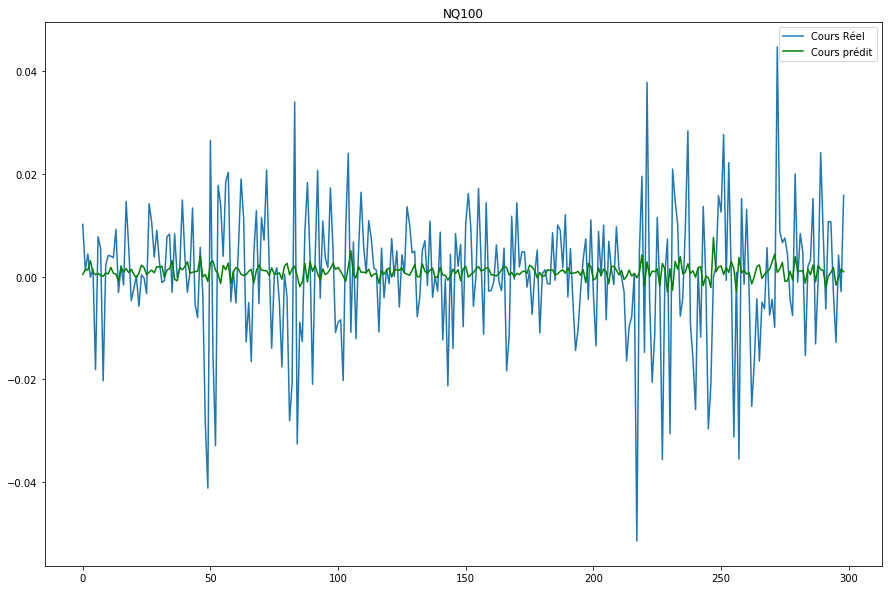

In [12]:
from sklearn.svm import LinearSVR
svr = LinearSVR()

svr.fit(Xtrain_sc, ytrain_sc)
y_pred = sc.inverse_transform(svr.predict(Xvisu_sc))

##### Affichage
plt.figure(figsize=(15,10))
plt.plot(y_visu, label="Cours Réel")
plt.plot(y_pred, color="green", label="Cours prédit")
plt.legend()
plt.title("NQ100")
plt.show()

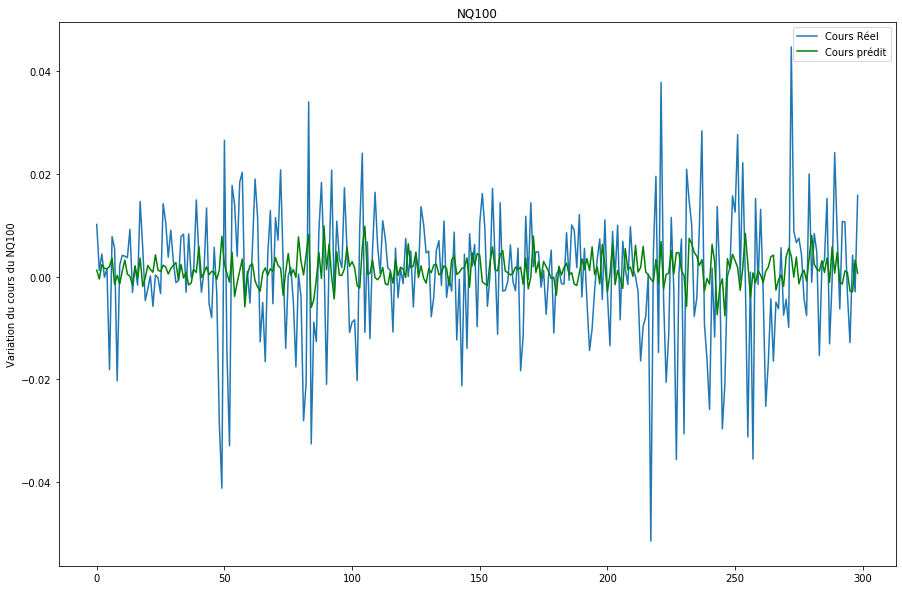

In [13]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(Xtrain_sc, ytrain_sc)
y_pred = sc.inverse_transform(svr.predict(Xvisu_sc))

##### Affichage
plt.figure(figsize=(15,10))
plt.plot(y_visu, label="Cours Réel")
plt.plot(y_pred, color="green", label="Cours prédit")
plt.legend()
plt.ylabel("Variation du cours du NQ100")
plt.title("NQ100")
plt.show()

In [8]:
##### On assemble la base de données
##### On fait le coefficient de corrélation entre les y réel et y prévu
bd = np.concatenate((y_visu, y_pred.reshape(len(y_pred),1)), axis=1)
pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).corr()

,Cours Réel,Cours prédit
Cours Réel,1.000000,0.141387
Cours prédit,0.141387,1.000000


In [9]:
from sklearn.metrics import r2_score
r2_score(y_visu, y_pred)

0.009158573972939177

##### 5.2 Arbre de décision regresseur


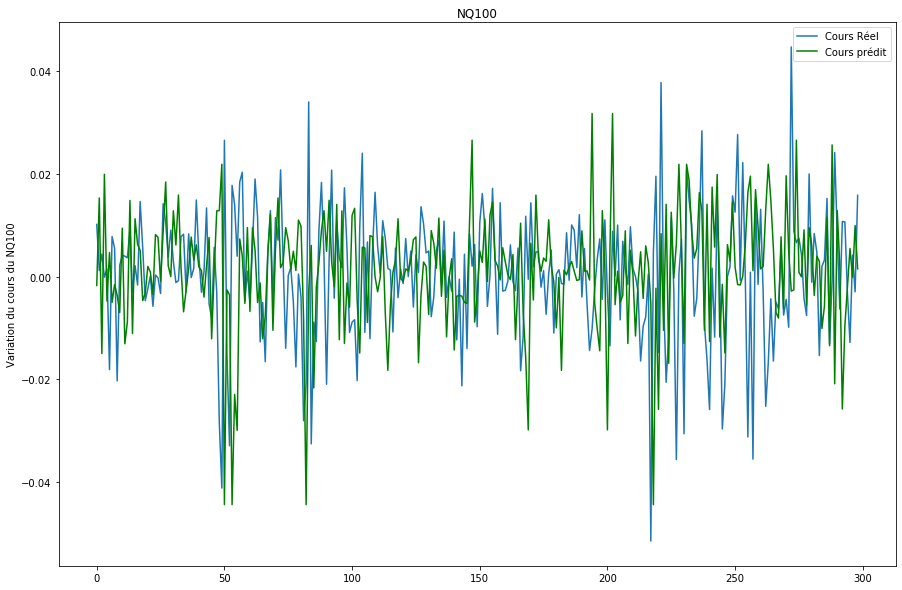

Corrélation: 0.02115812405390341
R2: -0.7805295656203921


In [14]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=None)

tree.fit(Xtrain_sc, ytrain_sc)
y_pred = sc.inverse_transform(tree.predict(Xvisu_sc))

##### Affichage
plt.figure(figsize=(15,10))
plt.plot(y_visu, label="Cours Réel")
plt.plot(y_pred, color="green", label="Cours prédit")
plt.legend()
plt.ylabel("Variation du cours du NQ100")
plt.title("NQ100")
plt.show()

bd = np.concatenate((y_visu, y_pred.reshape(len(y_pred),1)), axis=1)
print("Corrélation:", pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).corr().values[0][1])


from sklearn.metrics import r2_score
print("R2:",r2_score(y_visu, y_pred))

In [15]:
##### On crée une liste vide pour la remplir avec les coefficients
##### de corrélation en fonction de la profondeur des arbres


correlation = list()
for i in range(1,150):
    tree = RandomForestRegressor(max_depth=i)

    tree.fit(Xtrain_sc, ytrain_sc)
    y_pred = sc.inverse_transform(tree.predict(Xvisu_sc))

    bd = np.concatenate((y_visu, y_pred.reshape(len(y_pred),1)), axis=1)

    correlation.append(pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).corr().values[0][1])

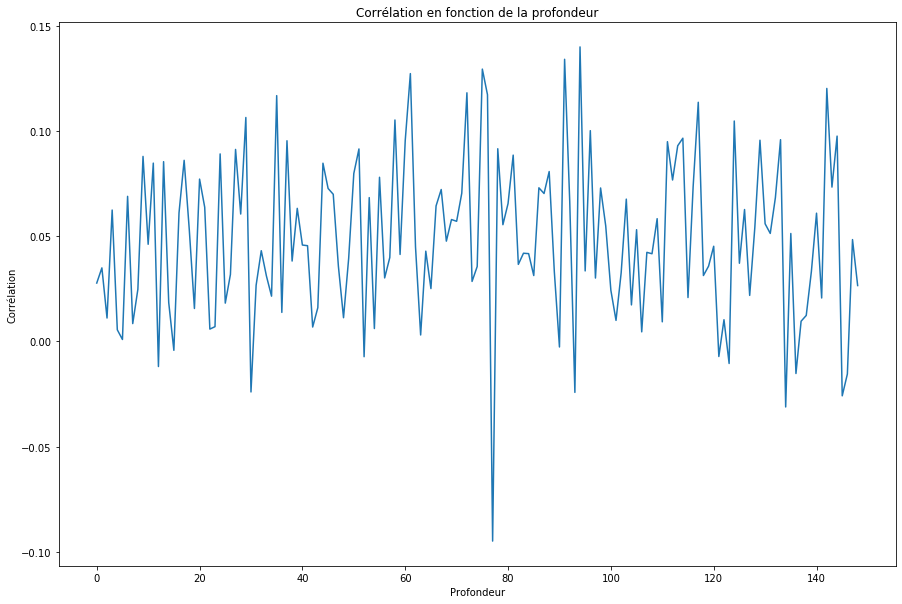

In [16]:
plt.figure(figsize=(15,10))
plt.title("Corrélation en fonction de la profondeur")
plt.ylabel("Corrélation")
plt.xlabel("Profondeur")
plt.plot(correlation)
plt.show()

##### 5.3 Foret aléatoire

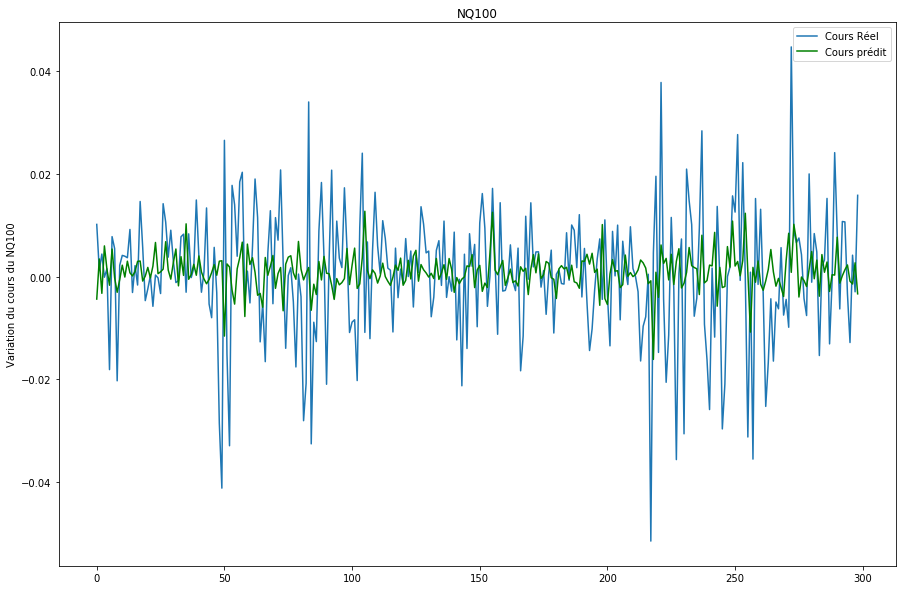

Corrélation: 0.05980003342883692
R2: -0.04455113986904902


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50)

rfr.fit(Xtrain_sc, ytrain_sc)
y_pred = sc.inverse_transform(rfr.predict(Xvisu_sc))

##### Affichage
plt.figure(figsize=(15,10))
plt.plot(y_visu, label="Cours Réel")
plt.plot(y_pred, color="green", label="Cours prédit")
plt.legend()
plt.ylabel("Variation du cours du NQ100")
plt.title("NQ100")
plt.show()

bd = np.concatenate((y_visu, y_pred.reshape(len(y_pred),1)), axis=1)
print("Corrélation:", pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).corr().values[0][1])


from sklearn.metrics import r2_score
print("R2:",r2_score(y_visu, y_pred))

In [29]:
##### On crée une liste vide pour la remplir avec les coefficients
##### de corrélation en fonction de la profondeur des arbres


correlation = list()
for i in range(10,550,10):
    rfr = RandomForestRegressor(n_estimators=i)

    rfr.fit(Xtrain_sc, ytrain_sc)
    y_pred = sc.inverse_transform(rfr.predict(Xvisu_sc))

    bd = np.concatenate((y_visu, y_pred.reshape(len(y_pred),1)), axis=1)

    correlation.append(pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).corr().values[0][1])

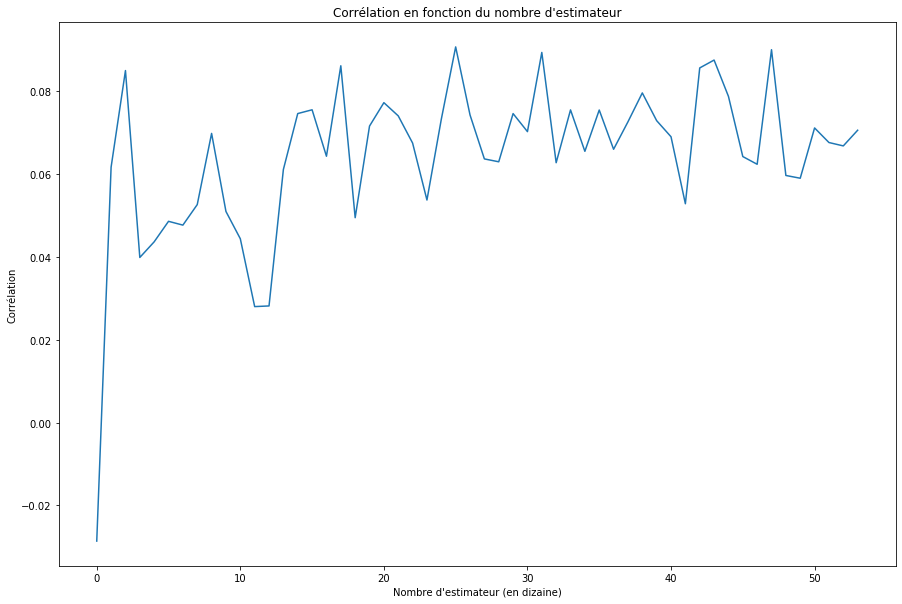

In [30]:
plt.figure(figsize=(15,10))
plt.title("Corrélation en fonction du nombre d'estimateur")
plt.ylabel("Corrélation")
plt.xlabel("Nombre d'estimateur (en dizaine)")
plt.plot(correlation)
plt.show()